<a href="https://colab.research.google.com/github/bforoura/AI/blob/main/Module6/Iris_MLP_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Training a Multilayer Perceptron on Iris Dataset**

* A multilayer perceptron (MLP) is one of most common artificial neural networks (ANNs)

* It consists of a layered, feedforward, completely connected network of artificial neurons (nodes)

* An example of a small network:


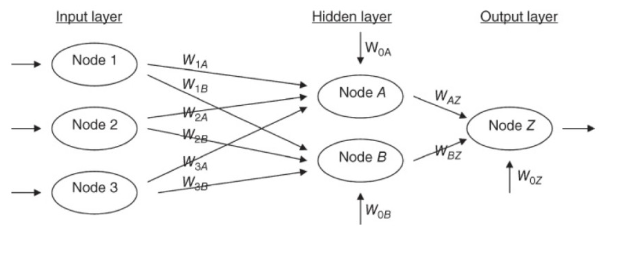

# **MLP Hyperparameters**

* Number of hidden layers
* Number of neurons in each hidden layer

* In **sklearn.neural_network.MLPClassifier**
> * hidden_layer_sizes = (9): one hidden layer with 9 neurons
> * hidden_layer_sizes = (9, 9, 9): three hidden layers with 9, 9 and 9 neurons respectively
> * default (100,): one hidden layer with 100 neurons

* One hidden layer MLP and Three layer MLP:

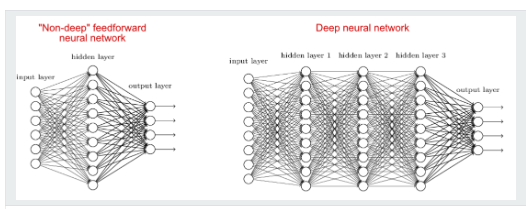

# **Train, Test, and Validation Split**

* When working with data science and machine learning, it’s crucial to have a clear understanding of how to split your data into different sets for training, testing, and validation purposes.


* When you are training a machine learning model, you need to split your data into three sets: the **training** set, the **test** set, and the **validation** set. The train set is used to train the model, the test set is used to evaluate the model, and the validation set is used to **tune the hyperparameters** of the model.

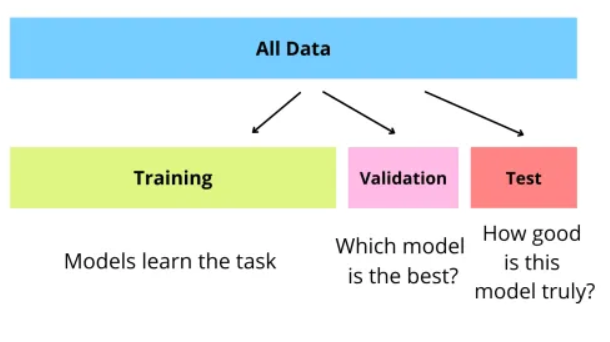


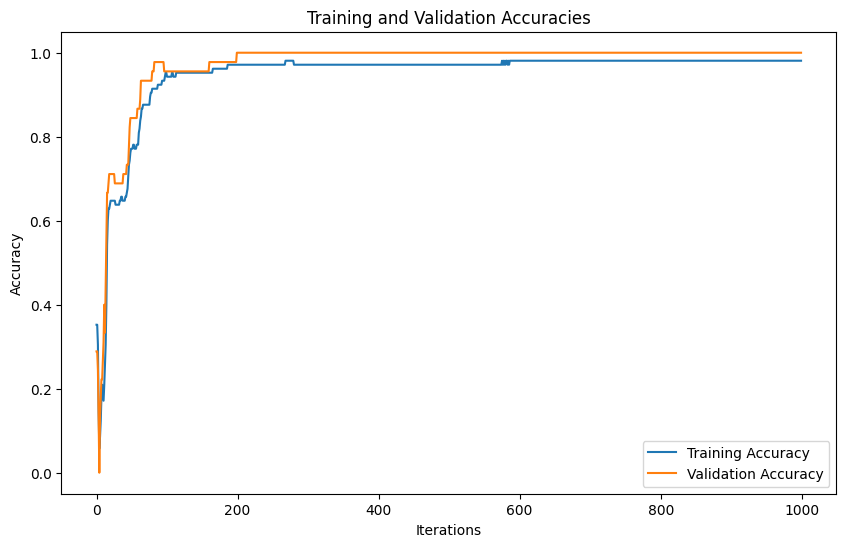

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets and shuffle them
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an MLPClassifier
# See https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
mlp = MLPClassifier(hidden_layer_sizes=(30,30), max_iter=1000)

# Initialize lists to store training and validation accuracies
train_accuracies = []
val_accuracies = []

# Train the MLPClassifier
for i in range(1000):
    # np. unique() get the unique values from an array given as parameter i
    mlp.partial_fit(X_train, y_train, classes=np.unique(y))
    y_train_pred = mlp.predict(X_train)
    y_val_pred = mlp.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_test, y_val_pred)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Plotting training and validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracies')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
